## Unidad 7: Dimensionalidad y Agrupación
### Actividad 13

### Sobre el ejemplo

* Para esta actividad utilizaremos un subconjunto de 25 items de la _International Personality Item Pool_, aplicados a 2800 individuos. El objetivo de esta información es desarrollar perfiles de personalidad en base a una serie de oraciones asociadas a las características _Amabilidad_, _Escrupolisidad_, _Extroversión_, _Neuroticismo_, _Apertura_ Los individuos deben responder qué tan adecuada es la oración respecto a su personalidad en base a 6 categorías:

    - 1: No me representa para nada.
    - 2: No me representa.
    - 3: Algunas cosas no me representan.
    - 4: Algunas cosas me representan.
    - 5: Me representa.
    - 6: Me representa completamente.


* Las 25 preguntas son:
    * `A1`  Soy indiferente a los sentimientos de otros.
    * `A2` Me preocupo del bienestar de otros. 
    * `A3` Sé cómo confortar a otros.
    * `A4` Me agradan los niños. 
    * `A5` Hago sentir tranquila a la gente. 
    * `C1` Soy exacto en mi trabajo.
    * `C2` Sigo con mis tareas hasta que todo esté perfecto.
    * `C3` Hago cosas siguiendo un plan.
    * `C4` Hago cosas con el mínimo esfuerzo.
    * `C5` Pierdo mi tiempo. 
    * `E1` No hablo mucho con las personas.
    * `E2` Me es dificil acercarme a otros.
    * `E3` Sé cómo cautivar gente.
    * `E4` Hago amigos de forma fácil. 
    * `E5` Puedo tomar el cargo de las cosas. 
    * `N1` Me enojo con facilidad.
    * `N2` Me irrito con facilidad.
    * `N3` Tengo cambios de humor frecuentes.
    * `N4` Usualmente me siento melancólico. 
    * `N5` Entro en pánico con facilidad. 
    * `O1` Estoy lleno de ideas.
    * `O2` Evito leer material difícil.
    * `O3` Tiendo a llevar la conversación a niveles más altos.
    * `O4` Dedico tiempo a la reflexión de cosas. 
    * `O5` No profundizaré sobre una materia específica. 
    
* Se registraron una serie de covariables sobre características demográficas de los encuestados:
    * `gender` Hombre = 1, Mujer =2.
    * `education` 1 = Educación Media Incompleta, 2 = Educación Media Completa, 3 = Educación Universitaria Incompleta, 4 = Educación Universitaria Completa 5 = Estudios de Postgrado.
    * `age` Edad en Años.
    
* Implementaremos un modelo de extracción factorial para identificar los principales perfiles psicológicos

## Ejercicio 1: Lectura de archivos

* Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
* Importe la base de datos `bfi.csv` y asígnela a un objeto `df`.
* Solicite las primeras 5 observaciones con `head`.

In [26]:
import pandas as pd
import numpy as np
import factor_analyzer as fact
import missingno as miss
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('bfi.csv')
df = df.drop(columns="Unnamed: 0")

In [3]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [4]:
df.describe()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
count,2784.000000,2773.00000,2774.000000,2781.000000,2784.000000,2779.000000,2776.000000,2780.000000,2774.000000,2784.000000,...,2764.000000,2771.000000,2778.000000,2800.000000,2772.000000,2786.000000,2780.000000,2800.000000,2577.000000,2800.000000
mean,2.413434,4.80238,4.603821,4.699748,4.560345,4.502339,4.369957,4.303957,2.553353,3.296695,...,3.185601,2.969686,4.816055,2.713214,4.438312,4.892319,2.489568,1.671786,3.190144,28.782143
std,1.407737,1.17202,1.301834,1.479633,1.258512,1.241347,1.318347,1.288552,1.375118,1.628542,...,1.569685,1.618647,1.129530,1.565152,1.220901,1.221250,1.327959,0.469647,1.107714,11.127555
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,...,2.000000,2.000000,4.000000,1.000000,4.000000,4.000000,1.000000,1.000000,3.000000,20.000000
50%,2.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,3.000000,...,3.000000,3.000000,5.000000,2.000000,5.000000,5.000000,2.000000,2.000000,3.000000,26.000000
75%,3.000000,6.00000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,...,4.000000,4.000000,6.000000,4.000000,5.000000,6.000000,3.000000,2.000000,4.000000,35.000000
max,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,2.000000,5.000000,86.000000


<Figure size 288x288 with 0 Axes>

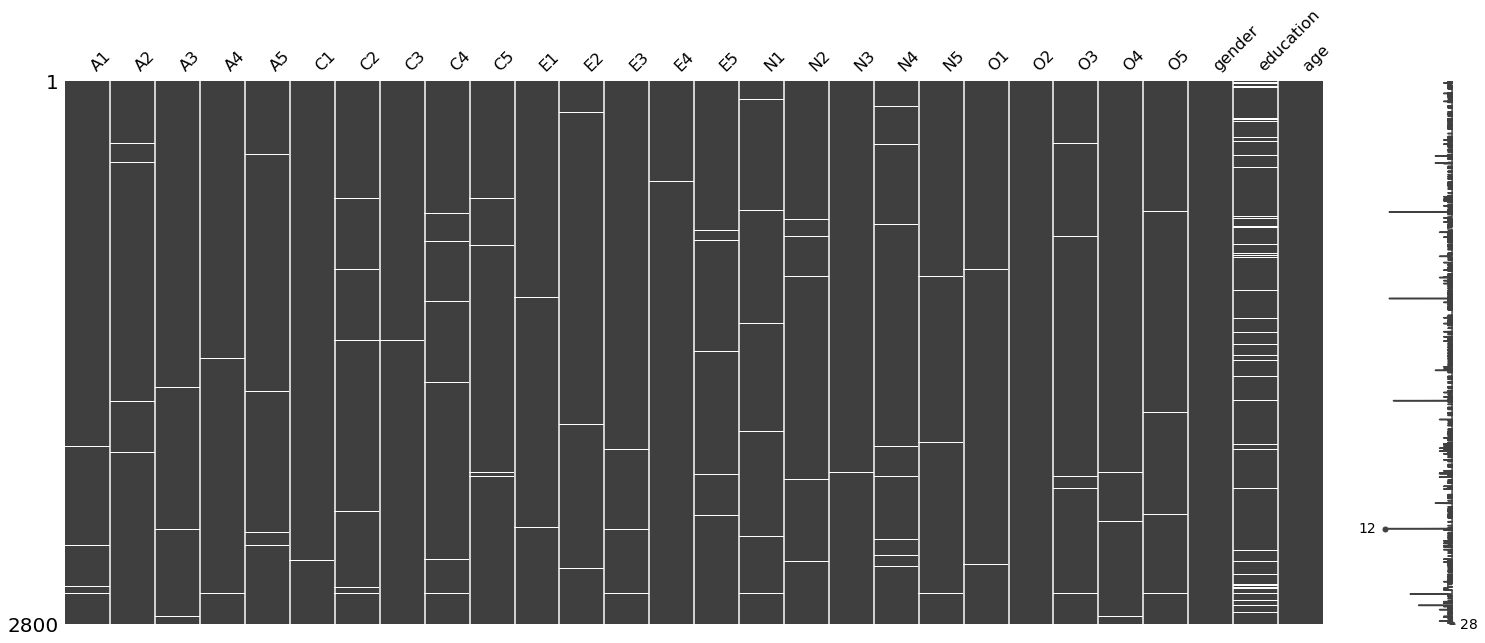

In [5]:
plt.figure(figsize=(4,4))
miss.matrix(df);

In [6]:
df_nonan = df.dropna()
df_nonan = df_nonan.reset_index()

In [7]:
df_nonan.describe()

,index,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,...,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,1406.976297,2.365385,4.834079,4.629249,4.749553,4.584973,4.569767,4.401163,4.322898,2.500894,...,3.175313,2.952147,4.821556,2.689177,4.483005,4.948122,2.455277,1.671288,3.191413,29.510286
std,795.545514,1.391968,1.156915,1.289373,1.447941,1.255833,1.216611,1.311310,1.287153,1.362817,...,1.560600,1.621980,1.120043,1.545865,1.193261,1.175435,1.329501,0.469850,1.111678,10.664222
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,713.250000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,...,2.000000,2.000000,4.000000,1.000000,4.000000,4.000000,1.000000,1.000000,3.000000,21.000000
50%,1428.500000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,...,3.000000,3.000000,5.000000,2.000000,5.000000,5.000000,2.000000,2.000000,3.000000,26.000000
75%,2087.500000,3.000000,6.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,4.000000,...,4.000000,4.000000,6.000000,4.000000,5.000000,6.000000,3.000000,2.000000,4.000000,36.000000
max,2799.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,2.000000,5.000000,86.000000


In [8]:
df2_nonan = df_nonan.loc[:,'gender':]

In [9]:
df_nonan = df_nonan.loc[:,'A1':'O5']

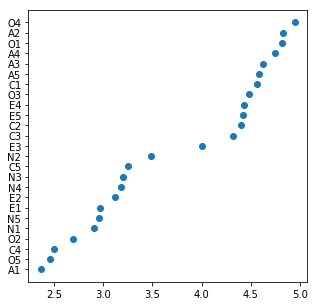

In [10]:
# Generamos dos arrays vacíos para guardar el nombre de la variable y la media
variable = []
mean = []

# para cada columna de la base, extraemos su nombre y sus valores
for colname, serie in df_nonan.iteritems():
    # guardamos el nombre en variable
    variable.append(colname)
    # calculamos y procesamos la media
    mean.append(serie.mean())

df_means = pd.DataFrame({'var':variable, 'mean': mean}).sort_values(by=['mean'])
plt.figure(figsize=(5,5))
plt.plot(df_means['mean'], df_means['var'],'o');

In [11]:
df_nonan.corr()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
A1,1.000000,-0.340197,-0.263031,-0.143494,-0.186059,0.019948,0.013543,-0.009442,0.099951,0.024136,...,0.159007,0.131985,0.088347,0.044236,0.007946,0.002522,0.066318,-0.062391,-0.089590,0.108565
A2,-0.340197,1.000000,0.484847,0.342175,0.382181,0.091673,0.125589,0.185624,-0.139100,-0.110892,...,-0.079604,-0.038506,-0.020430,-0.086230,0.024141,0.108006,0.032444,0.146559,0.053878,-0.079440
A3,-0.263031,0.484847,1.000000,0.376834,0.502886,0.101067,0.144902,0.132825,-0.116813,-0.146570,...,-0.068540,-0.083514,-0.028560,-0.132673,-0.040365,0.140990,0.030827,0.215028,0.024206,-0.037213
A4,-0.143494,0.342175,0.376834,1.000000,0.315100,0.082565,0.218129,0.131997,-0.160647,-0.239115,...,-0.094086,-0.145169,-0.066742,-0.159955,-0.002438,0.042507,0.050961,0.041559,-0.062844,0.035086
A5,-0.186059,0.382181,0.502886,0.315100,1.000000,0.123506,0.109298,0.130828,-0.117426,-0.162885,...,-0.191998,-0.189259,-0.129606,-0.210788,-0.076530,0.146134,0.001511,0.221910,0.003594,-0.042743
C1,0.019948,0.091673,0.101067,0.082565,0.123506,1.000000,0.426832,0.319043,-0.349772,-0.250581,...,-0.059050,-0.027501,-0.011744,-0.090103,-0.049890,0.177091,-0.132752,0.187587,0.081690,-0.131124
C2,0.013543,0.125589,0.144902,0.218129,0.109298,0.426832,1.000000,0.355576,-0.383390,-0.299011,...,-0.016305,-0.001259,0.008738,-0.037006,0.049420,0.155080,-0.050808,0.178356,0.031215,-0.056560
C3,-0.009442,0.185624,0.132825,0.131997,0.130828,0.319043,0.355576,1.000000,-0.354453,-0.352470,...,-0.079724,-0.063342,-0.073461,-0.129318,-0.035458,0.090573,-0.032512,0.057176,-0.000161,0.004521
C4,0.099951,-0.139100,-0.116813,-0.160647,-0.117426,-0.349772,-0.383390,-0.354453,1.000000,0.484126,...,0.210419,0.151887,0.197350,0.279304,0.212250,-0.098238,0.206884,-0.069876,0.071812,0.183007
C5,0.024136,-0.110892,-0.146570,-0.239115,-0.162885,-0.250581,-0.299011,-0.352470,0.484126,1.000000,...,0.205398,0.236622,0.232637,0.350796,0.183551,-0.087541,0.118552,-0.065530,0.140063,0.048952


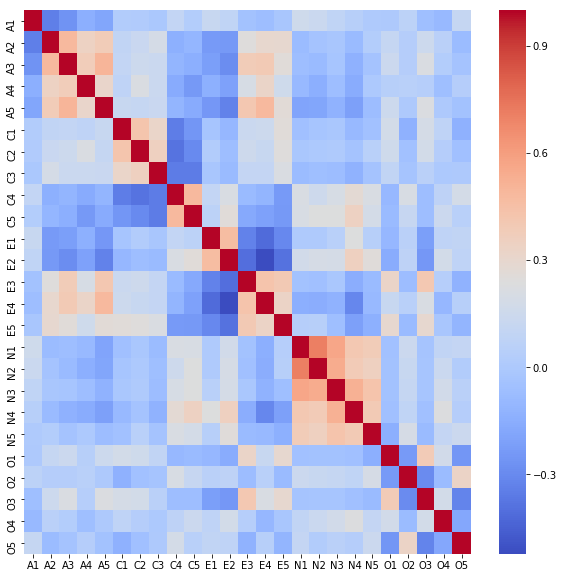

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df_nonan.corr(), cmap='coolwarm');

Al observar la matiz de la correlación, se puede apreciar que existe una alta correlación entre las preguntas de la batería.

## Ejercicio 4: Extracción de factores

* Antes de iniciar la extracción de factores, inspeccione la ideonidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esferacidad de Barlett y Kaiser-Meyer-Olkin. Comente los resultados.
* Instancie un objeto con `FactorAnalyzer()` donde se estimen 10 dimensiones latentes y no se aplique rotación.
* Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.
* Refactorice el objeto con `FactorAnalyzer()` para incluir la cantidad de dimensiones válidas que informó el scree plot. 
* Extraiga las cargas $\lambda$ del modelo e identifique qué items están asociados a cada factor. Comente sobre qué significa cada factor construído.

## Prueba de esferacidad de errores de Bartlett

* Con nuestra matriz de factores estimada, ahora debemos preguntarnos si nuestra matriz de correlaciones está relacionada con una matriz de identidad (matriz donde la diagonal principal es de 1 y los triángulos superiores e inferiores son 0). 
* De manera similar a las otras pruebas de estadísticos de ajuste, si encontramos evidencia para fallar en rechazar la hipótesis nula, la prueba concluye que la matriz sigue una distribución multivariada normal no sigue una matriz de identidad, por lo que se puede proceder con el análisis de factores

In [13]:
fact.calculate_bartlett_sphericity(df_nonan)

(16484.781654160415, 0.0)

La prueba retorna un puntaje `chi-square` de la distribución y un `p-value` asociado a esa prueba. En este caso, la prueba de esferacidad de errores sugiere que la matriz de correlaciones no es igual a la matriz de identidad, por lo que se puede seguir con el análisis.

## Prueba de muestreo Kaiser-Meyer-Olkin (KMO)

* De manera adicional a la prueba de Bartlett, podemos medir si las correlaciones parciales dentro de la matriz son cercanas a 0. De ser este el caso, la prueba sugiere la existencia de por lo menos un factor latente dentro de la batería de preguntas.
* Se puede implementar mediante el método `calculate_kmo` de la librería `factor_analyzer`.

In [14]:
fact.calculate_kmo(df_nonan)

(         KMO
 A1  0.738005
 A2  0.834387
 A3  0.871681
 A4  0.870525
 A5  0.900699
 C1  0.838225
 C2  0.788569
 C3  0.849578
 C4  0.823776
 C5  0.861994
 E1  0.841634
 E2  0.883987
 E3  0.893156
 E4  0.878282
 E5  0.894127
 N1  0.778281
 N2  0.778607
 N3  0.860167
 N4  0.886345
 N5  0.860604
 O1  0.855123
 O2  0.783962
 O3  0.833868
 O4  0.781271
 O5  0.758213, 0.8469455121781353)

 El método devuelve el puntaje KMO para cada item dentro de la batería, así como un puntaje global para todos los items.
* Se sugiere que para seguir con el análisis factorial, el KMO debe presentar valores superiores a .7. En este caso se satisface el punto y podemos proseguir.
* Ante el caso en que encontremos puntajes bajos, la estructura a estimar se puede mejorar al eliminar los items con cargas KMO inferiores al puntaje de corte.
* La eliminación de éstos items permite liberar la matriz de elementos inestables que dificulten la identificación de los factores a extraer.

La prueba de muestreo KMO indica que todos los atributos tienen valores 0.7, por lo cual, son útil en el objetivo de buscar atributos con alta varianza

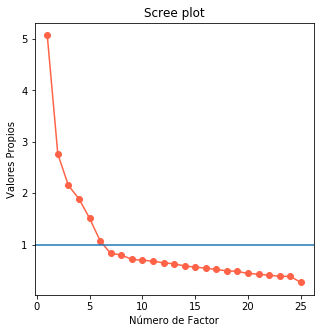

In [15]:
# Generamos una nueva instancia en el objeto factorize
factorize = fact.FactorAnalyzer()
# Implementamos el análisis
factorize.analyze(data=df_nonan, n_factors=10, method='varimax')
# extraemos los eigenvalues 
factor_screeplot = factorize.get_eigenvalues()[0]
# graficamos los eigenvalues contra la cantidad de dimensiones estimables
plt.figure(figsize=(5,5))
plt.plot(factor_screeplot.index + 1, factor_screeplot.values, 'o-', color='tomato')
plt.xlabel('Número de Factor')
plt.ylabel('Valores Propios')
# visualizamos el criterio de corte
plt.axhline(1)
plt.title("Scree plot");

* A modo de guía: Un factor con valor propio de __exactamente__ 1 significa que ese factor explica una parte de la varianza igual a la de una variable, de forma análoga, un factor con valor propio mayor/menor a 1 explica una varianza total mayor/menor a la de una sola variable.

* La convención indica que se deben preservar todos los factores con eigenvalues mayores a 1. De esta forma maximizamos la cantidad de varianza explicada por la matriz. Los resultados indican que hay 5 dimensiones substanciales.

In [16]:
# Generamos una nueva instancia en el objeto factorize
factorize = fact.FactorAnalyzer()
# Implementamos el análisis
factorize.analyze(data=df_nonan, n_factors=5, method='varimax')

In [17]:
factor_loadings = factorize.loadings
factor_loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
A1,0.116593,0.149412,0.068191,-0.075617,-0.451705
A2,0.130895,0.049023,0.072670,-0.011234,0.587349
A3,0.243638,0.036805,0.021319,-0.014470,0.603462
A4,0.112788,-0.026504,0.186193,-0.185005,0.408451
A5,0.323873,-0.085975,-0.024192,0.004120,0.484016
C1,-0.038014,0.078560,0.564973,0.161000,-0.025636
C2,-0.107284,0.155952,0.690145,0.044214,0.058758
C3,-0.088519,0.025665,0.598839,-0.056700,0.065734
C4,0.062198,0.175909,-0.644196,-0.054569,0.032090
C5,-0.069523,0.202749,-0.557100,0.086478,0.031139


In [18]:
factor_loadings.applymap(lambda x: np.where(x < .4, ' ', round(x, 2)))

,Factor1,Factor2,Factor3,Factor4,Factor5
A1,,,,,
A2,,,,,0.59
A3,,,,,0.6
A4,,,,,0.41
A5,,,,,0.48
C1,,,0.56,,
C2,,,0.69,,
C3,,,0.6,,
C4,,,,,
C5,,,,,


El análisis factorial agrupa las preguntas que mantienen relación entre sí, es decir, los factores agrupan el tema de la pregunta que se le realizó al encuestado (personal, laboral, etc)

## Ejercicio 5: Modelación de factores

* Extraiga los puntajes del modelo factorial a su base de datos.
* Grafique la densidad de cada uno con `kdplot`.
* Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:

![logo](eq1.gif)

In [19]:
extract_factor_scores = factorize.get_scores(df_nonan)

/home/sebastiancz/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


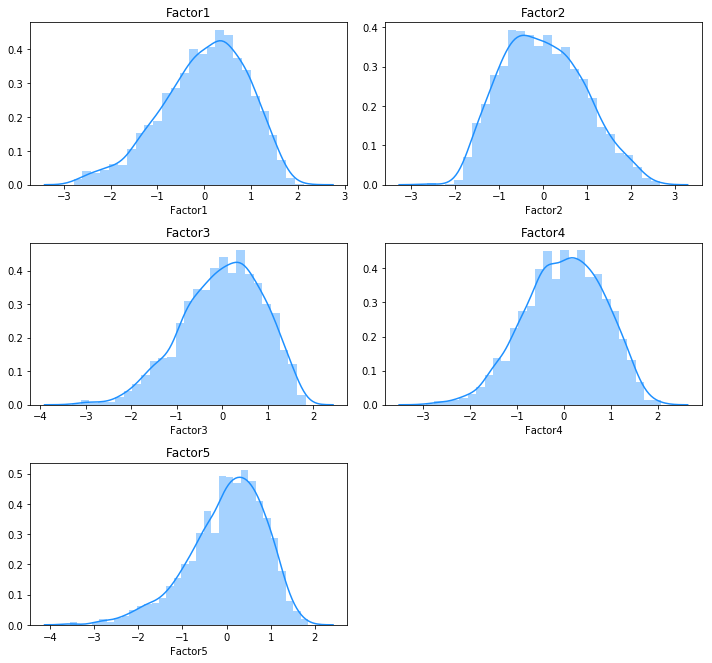

In [20]:
plt.figure(figsize = (10,15))
for index,value in enumerate (extract_factor_scores):
    plt.subplot(5,2, index + 1)
    plt.title(value)
    plt.tight_layout()
    sns.distplot(extract_factor_scores.loc[:, value], label=value, color='dodgerblue')

In [21]:
df_final= pd.concat([df2_nonan,extract_factor_scores], axis=1)

In [81]:
model1 = smf.ols('Factor1 ~ gender + education + age', df_final)
model1 = model1.fit()
results = model1.summary()
results.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.4738,0.097,-4.889,0.000,-0.664,-0.284
gender,0.2142,0.041,5.249,0.000,0.134,0.294
education,-0.0141,0.018,-0.791,0.429,-0.049,0.021
age,0.0054,0.002,2.933,0.003,0.002,0.009


In [83]:
model1 = smf.ols('Factor2 ~ gender + education + age', df_final)
model1 = model1.fit()
results = model1.summary()
results.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0124,0.098,-0.127,0.899,-0.205,0.180
gender,0.1842,0.041,4.452,0.000,0.103,0.265
education,-0.0036,0.018,-0.199,0.842,-0.039,0.032
age,-0.0096,0.002,-5.111,0.000,-0.013,-0.006


In [84]:
model1 = smf.ols('Factor3 ~ gender + education + age', df_final)
model1 = model1.fit()
results = model1.summary()
results.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.5217,0.094,-5.556,0.000,-0.706,-0.338
gender,0.1665,0.040,4.210,0.000,0.089,0.244
education,0.0016,0.017,0.091,0.927,-0.032,0.035
age,0.0081,0.002,4.491,0.000,0.005,0.012


In [85]:
model1 = smf.ols('Factor4 ~ gender + education + age', df_final)
model1 = model1.fit()
results = model1.summary()
results.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.0827,0.088,-0.935,0.350,-0.256,0.091
gender,-0.1787,0.037,-4.803,0.000,-0.252,-0.106
education,0.0886,0.016,5.460,0.000,0.057,0.120
age,0.0033,0.002,1.975,0.048,2.44e-05,0.007


In [86]:
model1 = smf.ols('Factor5 ~ gender + education + age', df_final)
model1 = model1.fit()
results = model1.summary()
results.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.8727,0.090,-9.729,0.000,-1.049,-0.697
gender,0.3895,0.038,10.311,0.000,0.315,0.464
education,0.0123,0.016,0.745,0.456,-0.020,0.045
age,0.0062,0.002,3.599,0.000,0.003,0.010


Al analizar los coeficientes de los OLS obtenidos al entrenar el modelo con los factores, se puede observar que ninguno contiene un suficiente poder explicativo para las variables `gender`, `education` y `age`.